In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

sparql.setQuery("""SELECT ?federal_subjects_russiaLabel ?borderLabel WHERE {
  {?federal_subjects_russia wdt:P31 wd:Q831740} UNION
  {?federal_subjects_russia wdt:P31 wd:Q835714} UNION
  {?federal_subjects_russia wdt:P31 wd:Q41162} UNION
  {?federal_subjects_russia wdt:P31 wd:Q183342} UNION
  {?federal_subjects_russia wdt:P31 wd:Q309166} UNION
  {?federal_subjects_russia wdt:P31 wd:Q184122}
  ?border wdt:P47 ?federal_subjects_russia
 
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()

rusSubject = []
for result in results["results"]["bindings"]:
    # Bordering Oblasts
    nb_subjects = result['federal_subjects_russiaLabel']['value'], result['borderLabel']['value']
    rusSubject.append(nb_subjects)

In [2]:
#rusSubject

In [3]:
subjectNames = list(set([x[0] for x in rusSubject]))
#subjectNames

In [4]:
len(subjectNames)

84

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

RUS1 = nx.Graph()
RUS1.add_nodes_from(subjectNames)
RUS1.add_edges_from(rusSubject)

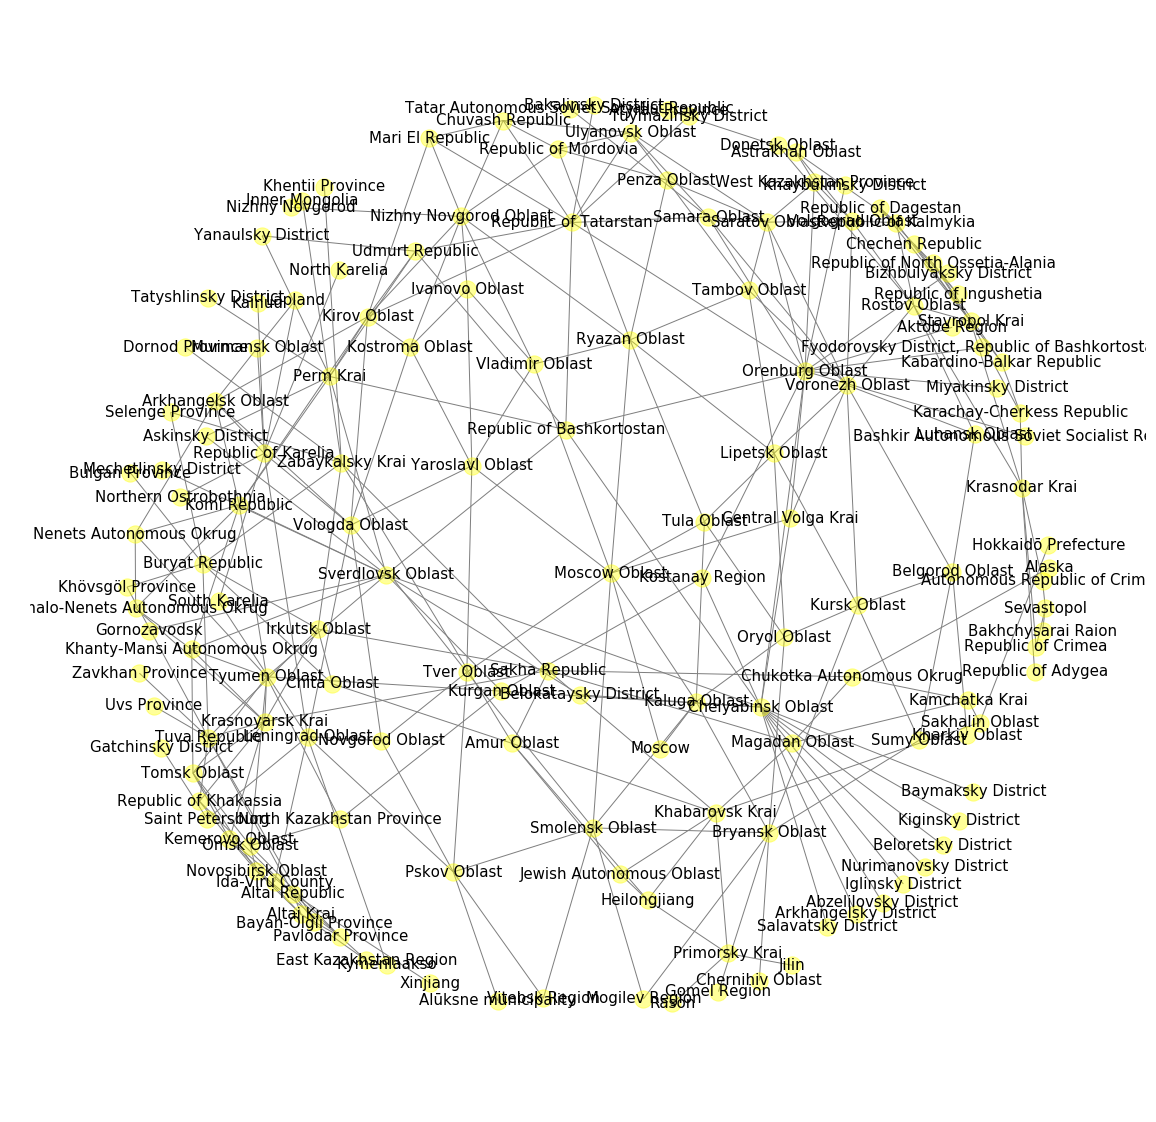

In [7]:
nx.spring_layout(RUS1)

plt.figure(figsize=(20,20))

pos = nx.spring_layout(RUS1)
nx.draw_networkx_nodes(RUS1, pos, 
                        nodelist=RUS1.nodes(),
                        node_color="yellow",
                        alpha=0.4)
nx.draw_networkx_labels(RUS1, pos, 
                        nodelist=RUS1.nodes(), 
                        font_size=15)
nx.draw_networkx_edges(RUS1, pos, 
                        edgelist=RUS1.edges(),
                        edge_color="grey")
plt.axis('off')
plt.show()

In [10]:
rusDegree = nx.degree(RUS1)    
rusSortedDeg = [(w,rusDegree[w]) for w in sorted(rusDegree, key=rusDegree.get, reverse=True)]
rusSortedDeg[:10]

[(u'Chelyabinsk Oblast', 15),
 (u'Orenburg Oblast', 14),
 (u'Sverdlovsk Oblast', 11),
 (u'Republic of Tatarstan', 10),
 (u'Voronezh Oblast', 10),
 (u'Nizhny Novgorod Oblast', 9),
 (u'Republic of Karelia', 9),
 (u'Tuva Republic', 9),
 (u'Kirov Oblast', 9),
 (u'Moscow Oblast', 9)]